In [2]:
# import pysam
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [3]:

regions={'posmhc':[32453110, 32577355],
'posmhc':[32589647, 32716541],
    'split_chr14_xaa': [19806333, 19976578],
 'split_chr7_xbc': [124810550, 125070920],
 'split_chr1_xak': [45762038, 46100296],
 'split_chr1_xbk': [188243362, 188513984]}

In [4]:
#chr14_xaa
less_95_xs_chr14=[]
less_95_ys_chr14=[]
from_95_to_99_xs_chr14=[]
from_95_to_99_ys_chr14=[]
from_99_to_999_xs_chr14=[]
from_99_to_999_ys_chr14=[]
larger_than_999_xs_chr14=[]
larger_than_999_ys_chr14=[]
#chr7
less_95_xs_chr7=[]
less_95_ys_chr7=[]
from_95_to_99_xs_chr7=[]
from_95_to_99_ys_chr7=[]
from_99_to_999_xs_chr7=[]
from_99_to_999_ys_chr7=[]
larger_than_999_xs_chr7=[]
larger_than_999_ys_chr7=[]
#chr1_xak
less_95_xs_chr1_xak=[]
less_95_ys_chr1_xak=[]
from_95_to_99_xs_chr1_xak=[]
from_95_to_99_ys_chr1_xak=[]
from_99_to_999_xs_chr1_xak=[]
from_99_to_999_ys_chr1_xak=[]
larger_than_999_xs_chr1_xak=[]
larger_than_999_ys_chr1_xak=[]
#chr1_xbk
less_95_xs_chr1_xbk=[]
less_95_ys_chr1_xbk=[]
from_95_to_99_xs_chr1_xbk=[]
from_95_to_99_ys_chr1_xbk=[]
from_99_to_999_xs_chr1_xbk=[]
from_99_to_999_ys_chr1_xbk=[]
larger_than_999_xs_chr1_xbk=[]
larger_than_999_ys_chr1_xbk=[]

In [5]:
def getmaxindices(allp,num):
    max_values_and_indices = sorted(enumerate(allp), key=lambda x: x[1], reverse=True)[:num]

    max_indices = [index for index, value in max_values_and_indices]
    return max_indices

In [6]:
!ln -s /data2/wangxuedong/mhc_test_data/csvfiles/pos_prob_split_chr14_xaa.csv ../csvfiles/
!ln -s /data2/wangxuedong/mhc_test_data/csvfiles/pos_prob_split_chr7_xbc.csv ../csvfiles/
!ln -s /data2/wangxuedong/mhc_test_data/csvfiles/pos_prob_split_chr1_xak.csv ../csvfiles/
!ln -s /data2/wangxuedong/mhc_test_data/csvfiles/pos_prob_split_chr1_xbk.csv ../csvfiles/

ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr14_xaa.csv': File exists
ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr7_xbc.csv': File exists
ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr1_xak.csv': File exists
ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr1_xbk.csv': File exists


In [7]:
#chr14_xaa
#[19806333, 19976578]
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr14_xaa.csv")
positions3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=19806333)&(df_mhc_pos_path["Unnamed: 0"]<=19976578)]["Unnamed: 0"].to_list()
Ps3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=19806333)&(df_mhc_pos_path["Unnamed: 0"]<=19976578)]["P"].to_list()
midpvalue=[]
mean_arr=-0.019077723390066942
std_arr=0.006128439002438663
for prob in Ps3:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr14.append(positions3[i])
        less_95_ys_chr14.append(Ps3[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr14.append(positions3[i])
        from_95_to_99_ys_chr14.append(Ps3[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr14.append(positions3[i])
        from_99_to_999_ys_chr14.append(Ps3[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr14.append(positions3[i])
        larger_than_999_ys_chr14.append(Ps3[i])
    else:
        print("not in this range")

In [8]:
# 'split_chr7_xbc': [124810550, 125070920],
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr7_xbc.csv")
positions4=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=124810550)&(df_mhc_pos_path["Unnamed: 0"]<=125070920)]["Unnamed: 0"].to_list()
Ps4=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=124810550)&(df_mhc_pos_path["Unnamed: 0"]<=125070920)]["P"].to_list()
midpvalue=[]
mean_arr=-0.019077723390066942
std_arr=0.006128439002438663
for prob in Ps4:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr7.append(positions4[i])
        less_95_ys_chr7.append(Ps4[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr7.append(positions4[i])
        from_95_to_99_ys_chr7.append(Ps4[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr7.append(positions4[i])
        from_99_to_999_ys_chr7.append(Ps4[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr7.append(positions4[i])
        larger_than_999_ys_chr7.append(Ps4[i])
    else:
        print("not in this range")

In [9]:
#'split_chr1_xak': [45762038, 46100296],
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr1_xak.csv")
positions5=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=45762038)&(df_mhc_pos_path["Unnamed: 0"]<=46100296)]["Unnamed: 0"].to_list()
Ps5=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=45762038)&(df_mhc_pos_path["Unnamed: 0"]<=46100296)]["P"].to_list()
midpvalue=[]
mean_arr=-0.019077723390066942
std_arr=0.006128439002438663
for prob in Ps5:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr1_xak.append(positions5[i])
        less_95_ys_chr1_xak.append(Ps5[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr1_xak.append(positions5[i])
        from_95_to_99_ys_chr1_xak.append(Ps5[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr1_xak.append(positions5[i])
        from_99_to_999_ys_chr1_xak.append(Ps5[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr1_xak.append(positions5[i])
        larger_than_999_ys_chr1_xak.append(Ps5[i])
    else:
        print("not in this range")

In [10]:
# 'split_chr1_xbk': [188243362, 188513984]}
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr1_xbk.csv")
positions6=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=188243362)&(df_mhc_pos_path["Unnamed: 0"]<=188513984)]["Unnamed: 0"].to_list()
Ps6=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=188243362)&(df_mhc_pos_path["Unnamed: 0"]<=188513984)]["P"].to_list()
midpvalue=[]
mean_arr=-0.019077723390066942
std_arr=0.006128439002438663
for prob in Ps6:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr1_xbk.append(positions6[i])
        less_95_ys_chr1_xbk.append(Ps6[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr1_xbk.append(positions6[i])
        from_95_to_99_ys_chr1_xbk.append(Ps6[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr1_xbk.append(positions6[i])
        from_99_to_999_ys_chr1_xbk.append(Ps6[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr1_xbk.append(positions6[i])
        larger_than_999_ys_chr1_xbk.append(Ps6[i])
    else:
        print("not in this range")

In [11]:

zipped_color_list={'ACB': [0.6199018140222545, 0.8273394036727978, 0.07681613835781242],
 'ASW': [0.5231784384407372, 0.5355615576319177, 0.6085573417584578],
 'All': [0.7478976414894968, 0.8581108654424285, 0.8152857852705114],
 'BEB': [0.7702098515876681, 0.34699071947424787, 0.387557687328841],
 'CDX': [0.9944848698557753, 0.4319680883089101, 0.6095703728222707],
 'CEU': [0.22146321845482853, 0.31820344771967357, 0.7921193188659656],
 'CHB': [0.09339120026575065, 0.49739737967690656, 0.9879237745701328],
 'CHS': [0.8750564664998141, 0.7338069529165195, 0.3058546593690403],
 'CLM': [0.737704221385458, 0.9209172916347589, 0.6000025255900048],
 'ESN': [0.03209678227783541, 0.8030222283085109, 0.30596638618321637],
 'FIN': [0.8623378159467614, 0.2079200577555228, 0.008672028349016814],
 'GBR': [0.4251541312392182, 0.3490460463116365, 0.8786460080999065],
 'GIH': [0.7525268826984933, 0.5333121198983907, 0.538554551310322],
 'GWD': [0.2627011188835271, 0.92851968237643, 0.4864089750510442],
 'IBS': [0.25115312032131665, 0.5397035754901451, 0.13380587437193459],
 'ITU': [0.9450480442890117, 0.5394575598574127, 0.8623826849068229],
 'JPT': [0.21405238204705113, 0.540757391337697, 0.08806809839137131],
 'KHV': [0.22561371426433752, 0.9164305579097723, 0.7907538310971419],
 'LWK': [0.20274923299053582, 0.4890267202072731, 0.8462139375324359],
 'MSL': [0.9951137970829559, 0.7005950908445686, 0.4989189517572168],
 'MXL': [0.3259201021356801, 0.8130093336742588, 0.9240844242162518],
 'PEL': [0.9871886206772149, 0.5709065709740972, 0.6773178323861238],
 'PJL': [0.6308240514007377, 0.7852668712542968, 0.7819736701998831],
 'PUR': [0.26909568610792434, 0.31557713998302317, 0.4779229844775781],
 'STU': [0.758551169090893, 0.8611540303381624, 0.3997187576590727],
 'TSI': [0.7384421240805822, 0.37820822943132903, 0.9005885384692488],
 'YRI': [0.42363231438946425, 0.7813235433022089, 0.8635294700674911]}

In [12]:
less_95 = zipped_color_list['YRI']
from_95_to_99 = zipped_color_list['TSI']
from_99_to_999 = zipped_color_list['CDX']
larger_than_999 = zipped_color_list['MSL']

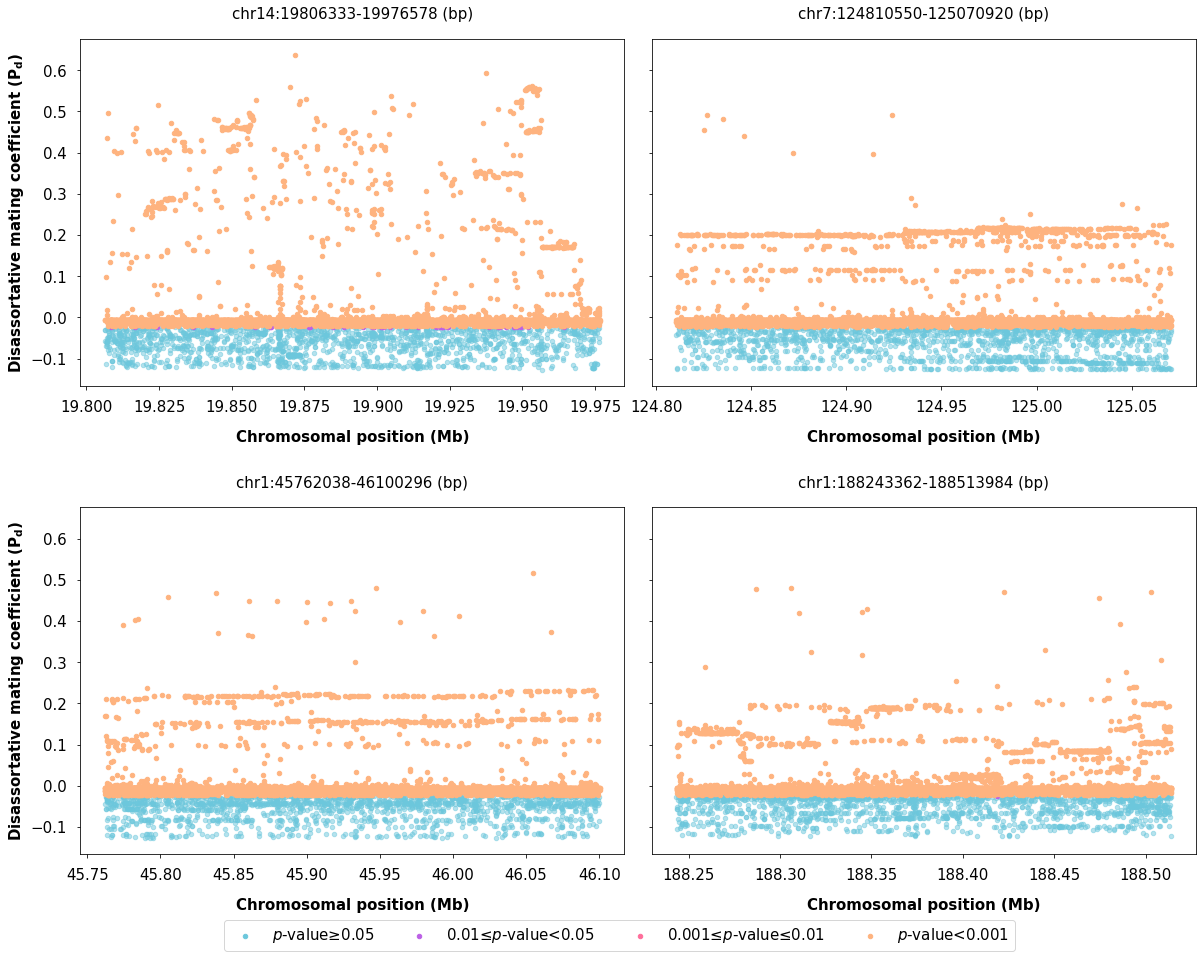

In [16]:
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linewidth'] = 1.2
plt.rcParams.update(
    {"text.usetex": False}
)

# plt.rcParams['mathtext.default'] = 'it'
plt.rcParams['mathtext.default'] = 'regular'
fig,axes = plt.subplots(nrows=2,ncols=2,sharey=True,figsize=(20,15), facecolor='white')
#first
axes[0,0].scatter(np.array(less_95_xs_chr14)/ 1000000,less_95_ys_chr14,color=less_95,s=20, alpha=0.5)
axes[0,0].scatter(np.array(from_95_to_99_xs_chr14)/ 1000000,from_95_to_99_ys_chr14,color=from_95_to_99,s=20)
axes[0,0].scatter(np.array(from_99_to_999_xs_chr14)/ 1000000,from_99_to_999_ys_chr14,color=from_99_to_999,s=20)
axes[0,0].scatter(np.array(larger_than_999_xs_chr14)/ 1000000,larger_than_999_ys_chr14,color=larger_than_999,s=20)
axes[0,0].set_title('chr14:19806333-19976578 (bp)',fontsize=15,pad=20)#chr14_xaa
# axes[0,0].legend(["$\mathit{p}$-value≥0.05","0.01≤$\mathit{p}$-value<0.05","0.001≤$\mathit{p}$-value≤0.01","$\mathit{p}$-value<0.001"],loc="best")
# index1=getmaxindices(Ps3,1)[0]
# x_max_pos=positions3[index1]/ 1000000
# y_max=Ps3[index1]
# y_max=float(format(y_max,'.5f'))
# axes[0,0].text(x_max_pos,y_max+0.05,f'(rs35899570, {r"$P_d$"}={y_max})',color=larger_than_999,fontsize=15,style='italic',)
        #  bbox=dict(boxstyle="round",
        #            ec=(1., 0.5, 0.5),
        #            fc="white",
        #            ))
#second
axes[0,1].scatter(np.array(less_95_xs_chr7)/ 1000000,less_95_ys_chr7,color=less_95,s=20, alpha=0.5)
axes[0,1].scatter(np.array(from_95_to_99_xs_chr7)/ 1000000,from_95_to_99_ys_chr7,color=from_95_to_99,s=20)
axes[0,1].scatter(np.array(from_99_to_999_xs_chr7)/ 1000000,from_99_to_999_ys_chr7,color=from_99_to_999,s=20)
axes[0,1].scatter(np.array(larger_than_999_xs_chr7)/ 1000000,larger_than_999_ys_chr7,color=larger_than_999,s=20)
axes[0,1].set_title('chr7:124810550-125070920 (bp)',fontsize=15,pad=20) #chr7_xbc
# axes[0,1].legend(["$\mathit{p}$-value≥0.05","0.01≤$\mathit{p}$-value<0.05","0.001≤$\mathit{p}$-value≤0.01","$\mathit{p}$-value<0.001"],loc="best")
# index2=getmaxindices(Ps4,1)[0]
# x_max_pos=positions4[index2]/ 1000000
# y_max=Ps4[index2]
# y_max=float(format(y_max,'.5f'))
# axes[0,1].text(x_max_pos,y_max+0.05,f'(rs866373381, {r"$P_d$"}={y_max})',color=larger_than_999,fontsize=15,style='italic',)
        #  bbox=dict(boxstyle="round",
        #            ec=(1., 0.5, 0.5),
        #            fc="white",
        #            ))
#third
axes[1,0].scatter(np.array(less_95_xs_chr1_xak)/ 1000000,less_95_ys_chr1_xak,color=less_95,s=20, alpha=0.5)
axes[1,0].scatter(np.array(from_95_to_99_xs_chr1_xak)/ 1000000,from_95_to_99_ys_chr1_xak,color=from_95_to_99,s=20)
axes[1,0].scatter(np.array(from_99_to_999_xs_chr1_xak)/ 1000000,from_99_to_999_ys_chr1_xak,color=from_99_to_999,s=20)
axes[1,0].scatter(np.array(larger_than_999_xs_chr1_xak)/ 1000000,larger_than_999_ys_chr1_xak,color=larger_than_999,s=20)
axes[1,0].set_title('chr1:45762038-46100296 (bp)',fontsize=15,pad=20)
# axes[1,0].legend(["$\mathit{p}$-value≥0.05","0.01≤$\mathit{p}$-value<0.05","0.001≤$\mathit{p}$-value≤0.01","$\mathit{p}$-value<0.001"],loc="best")
# index2=getmaxindices(Ps5,1)[0]
# x_max_pos=positions5[index2]/ 1000000
# y_max=Ps5[index2]
# y_max=float(format(y_max,'.5f'))
# axes[1,0].text(x_max_pos-0.13,y_max+0.05,f'(rs1435323718, {r"$P_d$"}={y_max})',color=larger_than_999,fontsize=15, style='italic',)
        #  bbox=dict(boxstyle="round",
        #            ec=(1., 0.5, 0.5),
        #            fc="white",
        #            ))
#fourth
axes[1,1].scatter(np.array(less_95_xs_chr1_xbk)/ 1000000,less_95_ys_chr1_xbk,color=less_95,s=20, alpha=0.5)
axes[1,1].scatter(np.array(from_95_to_99_xs_chr1_xbk)/ 1000000,from_95_to_99_ys_chr1_xbk,color=from_95_to_99,s=20)
axes[1,1].scatter(np.array(from_99_to_999_xs_chr1_xbk)/ 1000000,from_99_to_999_ys_chr1_xbk,color=from_99_to_999,s=20)
axes[1,1].scatter(np.array(larger_than_999_xs_chr1_xbk)/ 1000000,larger_than_999_ys_chr1_xbk,color=larger_than_999,s=20)
axes[1,1].set_title(f'chr1:188243362-188513984 (bp)',fontsize=15,pad=20)#chr1_xak
legend=axes[1,1].legend(["$\mathit{p}$-value≥0.05","0.01≤$\mathit{p}$-value<0.05","0.001≤$\mathit{p}$-value≤0.01","$\mathit{p}$-value<0.001"],
                 loc="lower left", bbox_to_anchor=(-0.8, -0.3),ncol=4)

for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [20] 
# index2=getmaxindices(Ps6,1)[0]
# x_max_pos=positions6[index2]/ 1000000
# y_max=Ps6[index2]
# y_max=float(format(y_max,'.5f'))
# # axes[1,1].scatter(x_max_pos,y_max,color=larger_than_999,s=30)
# # axes[1,1].scatter(x_max_pos,y_max,color=larger_than_999,s=20, edgecolors='black')
# axes[1,1].text(x_max_pos,y_max+0.05,f'(rs1220350218, {r"$P_d$"}={y_max})',color=larger_than_999,fontsize=15, style='italic')
# axes[1,1].text(x_max_pos,y_max+0.05,"\x1B[3m" + "rs1220350218" + "\x1B[0m"+str(y_max),color=larger_than_999,fontsize=15,
        #  bbox=dict(boxstyle="round",
        #            ec=(1., 0.5, 0.5),
        #            fc="white",
        #            ))


# max_y = 1
# axes[0,0].set_ylim(-0.25, max_y)
# yticks = np.linspace (-0.25,max_y, num=5)
# axes[0,0].set_yticks(yticks)


axes[0,0].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[0,0].set_ylabel(r"Disassortative mating coefficient ($P_d$)",fontsize=15, weight = 'bold')
axes[0,1].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[1,0].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[1,0].set_ylabel(r"Disassortative mating coefficient ($P_d$)",fontsize=15, weight = 'bold')
axes[1,1].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
# axes[0,0].set(xlabel='Position',ylabel='P')
# axes[0,1].set(xlabel='Position')
# axes[1,0].set(xlabel='Position')
# axes[1,1].set(xlabel='Position')
# fig.suptitle('Disassortative mating non-MHC region',fontsize=30)

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=15,pad=10)

plt.subplots_adjust(wspace=0.05, hspace=0.35)
plt.plot()
# plt.savefig("../../formalfigs/pic1_non_mhc_complementary_region_2023_05_05.png",dpi=300)
plt.savefig('pic1_nonmhc.png', dpi=600, bbox_inches='tight')
